<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/paphos_daily_weather_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

In [1]:
from datetime import datetime, timedelta

# Get today's date
today = datetime.now() - timedelta(days=1)

# Calculate the date 14 days ago
date_14_days_ago = today - timedelta(days=14)

# Format the dates in YYYY-MM-DD format
today_str = today.strftime('%Y-%m-%d')
date_14_days_ago_str = date_14_days_ago.strftime('%Y-%m-%d')


date1=date_14_days_ago_str
date2=today_str

print ("from ", date1, " to ", date2)



paphos="34.68,32.61"

sc="33.46242581990894,-79.13561525981794"

#prompt=input("1 for Pahos 2 for Myrtle Beach ")

prompt = "1"

if prompt == "1":
  location=paphos
  filestr = "paphos"
  unitgroup = "metric"
else:
  location=sc
  filestr = "sc"
  unitgroup = "us"


#apikey = input("API Key")

apikey="ET2UEWPH7KFHT289DDMPTQJFV"

#thomas
#apikey="7GV5JCTFSZYEZ2XZGJUE9SDMD"


from  2025-01-04  to  2025-01-18


In [2]:

url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv&unitGroup={4}'.format(location,date1,date2,apikey,unitgroup)

import requests

headers = {'Accept': 'text/csv'}


# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a CSV file
    with open(filestr + ".csv", 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded and saved as ", filestr + ".csv")
else:
    print(f"Failed to retrieve the CSV file. Status code: {response.status_code}")

import pandas as pd



CSV file downloaded and saved as  paphos.csv


In [40]:
import pandas as pd

#df=pd.read_csv(filestr + ".csv",usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])

df=pd.read_csv(filestr + ".csv",parse_dates=['datetime'])
df.set_index('datetime', inplace=True)
now=df

# rem out time filter for winter
#df=df.between_time('08:00', '18:00')

In [7]:
# copy current weather to Google Drive


from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Source path of your file (assuming it's in the current working directory)
source_path = filestr + ".csv"

# Destination path in your Google Drive
#destination_path = '/content/drive/My Drive/' + filestr + "." + today_str

destination_path = '/content/drive/My Drive/weather/' + filestr +  today_str + ".csv"

# Copy the file
shutil.copy(source_path, destination_path)

print(f'File saved to {now_destination_path}')

Mounted at /content/drive


'/content/drive/My Drive/weather/paphos2025-01-18.csv'

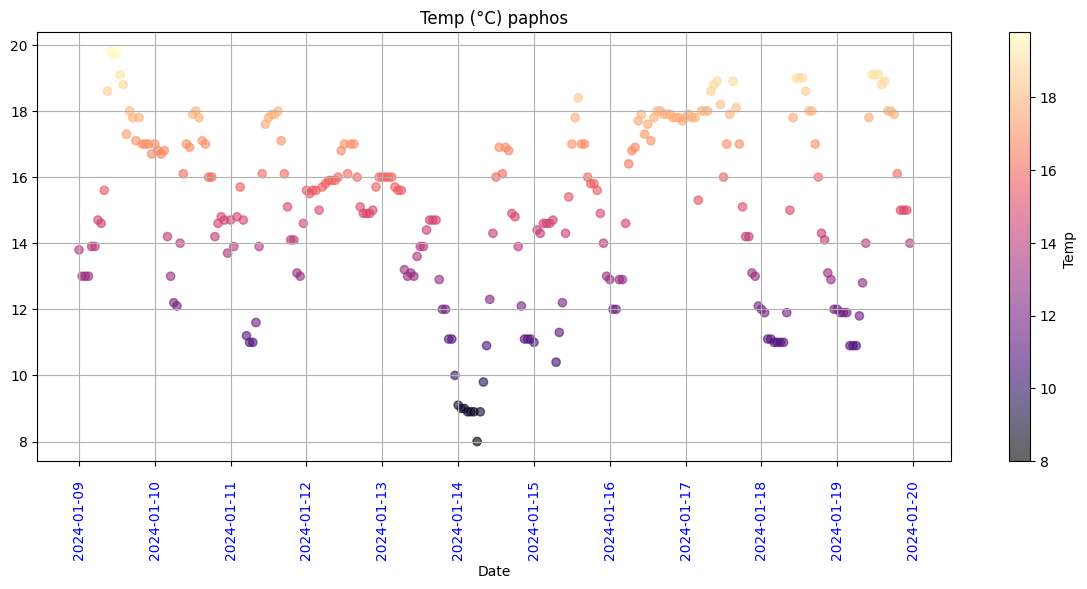

In [41]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

#plt.cm.hot_r

# Scatter plot with colormap
sc = ax.scatter(df.index, df['temp'], c=df['temp'],cmap="magma",  alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Temp ')

# Set labels
ax.set_xlabel('Date')

plt.xticks(rotation=90)

# Set major and minor ticks format
ax.xaxis.set_major_locator(mdates.DayLocator())
#ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Rotate x-ticks
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))
#plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, color='purple', ha='center', va='bottom')

# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)

#ax.tick_params(axis='x', which='major', pad=15)

#plt.ylim(80,95)

# Adding a title
if unitgroup == "metric":
  plt.title('Temp (°C) ' + filestr)
else:
  plt.title('Temp (°F) ' + filestr)

# Adding legends
#plt.legend()

plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

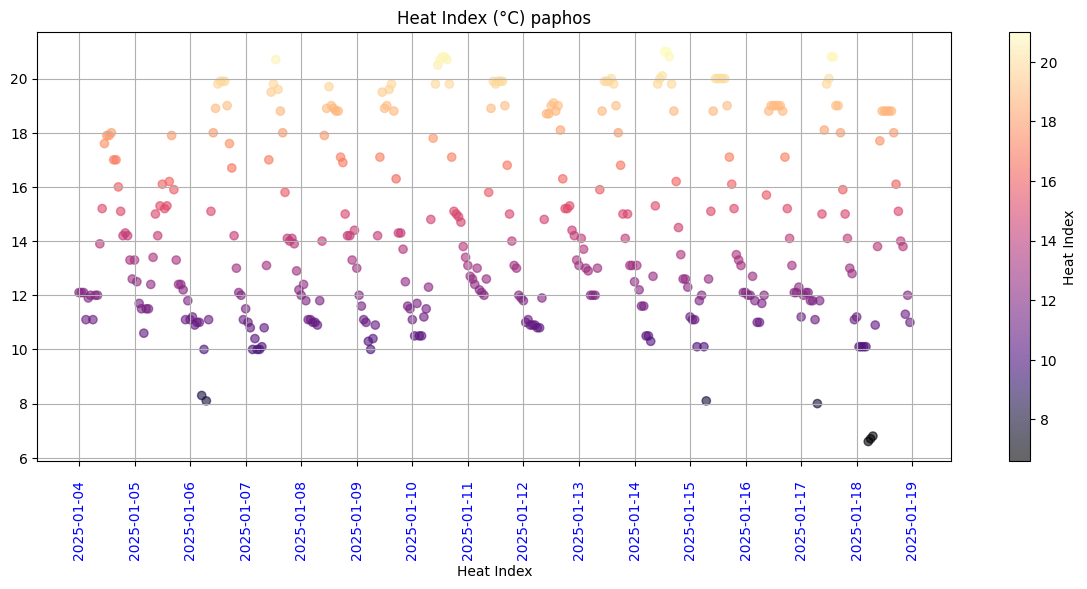

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['feelslike'], c=df['feelslike'], cmap='magma', alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index')

# Set labels
ax.set_xlabel('Heat Index')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))



plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))


# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)
# ax.tick_params(axis='x', which='major', pad=15)

# Adding a title
if unitgroup == "metric":
    plt.title('Heat Index (°C) ' + filestr)
else:
    plt.title('Heat Index (°F) ' + filestr)

plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()


# Save LastYear's Data

In [10]:
# Calculate the date for 'yesterday' in UTC
yesterday = datetime.utcnow() - timedelta(days=1)
yesterday_str = yesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before yesterday' in UTC
tendays = yesterday - timedelta(days=14)
tendays_str = tendays.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '1 year before yesterday' in UTC
lastyearyesterday = yesterday - timedelta(days=365)
lastyearyesterday_str = lastyearyesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before 1 year before yesterday' in UTC
lastyeartendays = lastyearyesterday - timedelta(days=10)
lastyeartendays_str = lastyeartendays.strftime('%Y-%m-%dT%H:%M:%SZ')


In [11]:

print("last year, last")
print("1 year before Yesterday (UTC):", lastyearyesterday_str)
print("10 days before 1 year before Yesterday (UTC):", lastyearyesterday_str)

date1=lastyeartendays_str
date2=lastyearyesterday_str

(date1,date2)

last year, last
1 year before Yesterday (UTC): 2024-01-19T03:11:36Z
10 days before 1 year before Yesterday (UTC): 2024-01-19T03:11:36Z


('2024-01-09T03:11:36Z', '2024-01-19T03:11:36Z')

In [12]:
url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv&unitGroup={4}'.format(location,date1,date2,apikey,unitgroup)

import requests

headers = {'Accept': 'text/csv'}


# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a CSV file
    with open(filestr + ".csv", 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded and saved as ", filestr + ".csv")
else:
    print(f"Failed to retrieve the CSV file. Status code: {response.status_code}")

CSV file downloaded and saved as  paphos.csv


In [13]:
lastyearstr = lastyearyesterday.strftime('%Y-%m-%d')
lastyearstr

'2024-01-19'

In [14]:
destination_path = '/content/drive/My Drive/weather/' + lastyearstr +  ".csv"

destination_path

'/content/drive/My Drive/weather/2024-01-19.csv'

In [15]:


# Copy the file
shutil.copy(source_path, destination_path)

print("saving ", destination_path)

saving  /content/drive/My Drive/weather/2024-01-19.csv


In [42]:
#df=pd.read_csv(filestr + ".csv",usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])

df=pd.read_csv(filestr + ".csv",parse_dates=['datetime'])

df.set_index('datetime', inplace=True)
df=df.between_time('08:00', '18:00')

last=df

In [43]:

now['match'] = now.index.strftime('%m-%d %H:%M')
last['match'] = last.index.strftime('%m-%d %H:%M')


intersection = pd.merge(now, last, on='match', how='inner')

In [44]:
intersection

,name_x,temp_x,feelslike_x,dew_x,humidity_x,precip_x,precipprob_x,preciptype_x,snow_x,snowdepth_x,...,sealevelpressure_y,cloudcover_y,visibility_y,solarradiation_y,solarenergy_y,uvindex_y,severerisk_y,conditions_y,icon_y,stations_y
0,"34.68,32.61",15.6,15.6,11.8,77.97,0.0,0,NaN,0,0.0,...,1013.4,89.0,8.2,7,0.0,0,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."
1,"34.68,32.61",18.6,18.6,12.0,65.54,0.0,0,NaN,0,0.0,...,1013.0,55.6,8.2,130,0.5,1,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."
2,"34.68,32.61",19.8,19.8,9.9,52.85,0.0,0,NaN,0,0.0,...,1013.0,48.3,8.2,482,1.7,5,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."
3,"34.68,32.61",19.7,19.7,9.9,53.15,0.0,0,NaN,0,0.0,...,1013.2,53.3,9.9,628,2.3,6,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."
4,"34.68,32.61",19.8,19.8,9.8,52.24,0.0,0,NaN,0,0.0,...,1012.0,48.5,9.9,578,2.1,6,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,"34.68,32.61",18.8,18.8,14.0,73.85,0.0,0,NaN,0,0.0,...,1019.3,74.1,12.4,172,0.6,2,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."
117,"34.68,32.61",18.9,18.9,14.8,77.06,0.0,0,NaN,0,0.0,...,1019.0,55.5,10.0,130,0.5,1,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."
118,"34.68,32.61",18.0,18.0,13.8,76.45,0.0,0,NaN,0,0.0,...,1019.0,55.7,10.0,33,0.1,0,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."
119,"34.68,32.61",18.0,18.0,14.7,80.94,0.0,0,NaN,0,0.0,...,1019.0,89.0,10.0,7,0.0,0,NaN,Partially cloudy,partly-cloudy-day,"17507099999,LCRA,17601099999,F1785,LCPH,175050..."


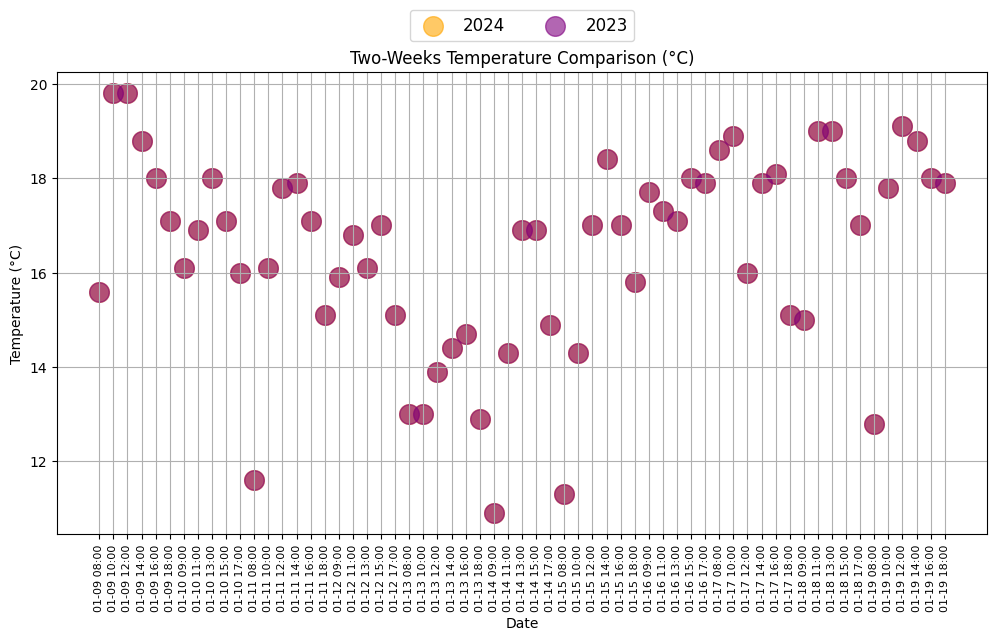

In [45]:
import matplotlib.pyplot as plt


df=intersection.iloc[::2, :]

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.scatter(df['match'], df['temp_x'], s=200, alpha=0.6, color="orange", label='2024')
ax.scatter(df['match'], df['temp_y'], s=200, alpha=0.6, color="purple", label='2023')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Temperature (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Two-Weeks Temperature Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)

plt.grid()

# Show the plot
plt.show()

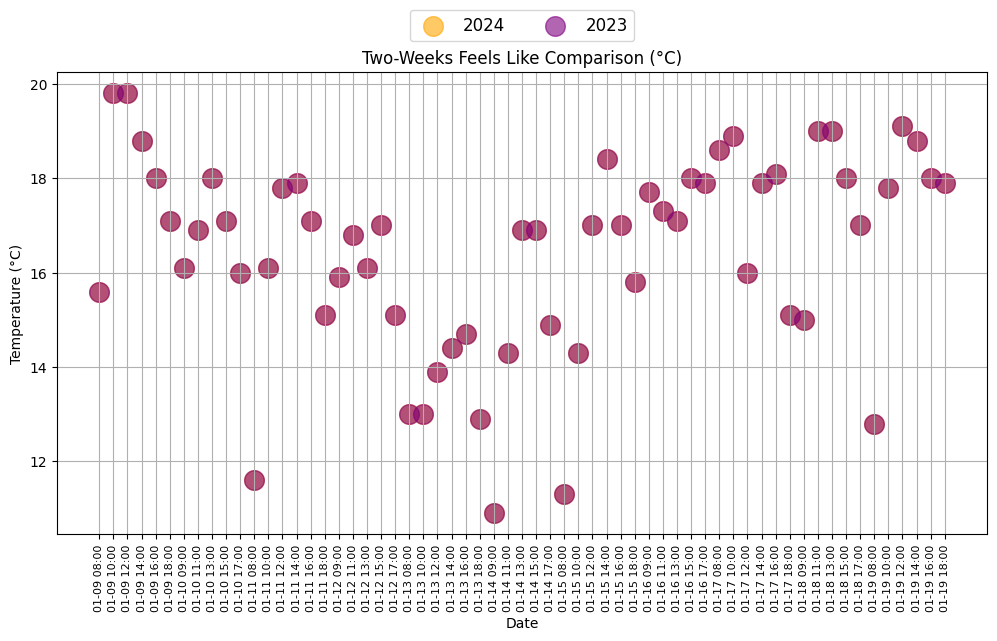

In [46]:

import matplotlib.pyplot as plt


df=intersection.iloc[::2, :]

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.scatter(df['match'], df['feelslike_x'], s=200, alpha=0.6, color="orange", label='2024')
ax.scatter(df['match'], df['feelslike_y'], s=200, alpha=0.6, color="purple", label='2023')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Temperature (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Two-Weeks Feels Like Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)

plt.grid()

# Show the plot
plt.show()

# Get Sea Conditions

In [23]:

from datetime import datetime, timedelta

# Calculate the date for 'yesterday' in UTC
yesterday = datetime.utcnow() - timedelta(days=1)
yesterday_str = yesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before yesterday' in UTC
tendays = yesterday - timedelta(days=10)
tendays_str = tendays.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '1 year before yesterday' in UTC
lastyearyesterday = yesterday - timedelta(days=365)
lastyearyesterday_str = lastyearyesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before 1 year before yesterday' in UTC
lastyeartendays = lastyearyesterday - timedelta(days=10)
lastyeartendays_str = lastyeartendays.strftime('%Y-%m-%dT%H:%M:%SZ')



apikey="b74de4f2-5352-11ef-aa85-0242ac130004-b74de5d8-5352-11ef-aa85-0242ac130004"




# https://dashboard.stormglass.io/

# https://docs.stormglass.io/?utm_medium=email&_hsenc=p2ANqtz-9NtG7HIa1BhxP3kX2NPRJLRhL3kaXEfAvVmC9k-p8qYUe0KFQrPtaz34Ucy8W71I9wyEopdsQsCGZxj-QaXWlZug1hHQ&_hsmi=290896009&utm_content=290896009&utm_source=hs_automation#/weather


import requests

params='currentDirection,currentSpeed,gust,waterTemperature,waveDirection,waveHeight,wavePeriod,windWaveDirection,windWaveHeight,windWavePeriod,windDirection,swellDirection,swellHeight,swellPeriod'


response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': 34.68,
    'lng': 32.61,
    'start' : tendays_str,
    'end' : yesterday_str,
    'params': params
  },
  headers={
    'Authorization': apikey
  }
)

# Do something with response data.
json_data = response.json()

params='currentDirection,currentSpeed,gust,waterTemperature,waveDirection,waveHeight,wavePeriod,windWaveDirection,windWaveHeight,windWavePeriod,windDirection,swellDirection,swellHeight,swellPeriod'

response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': 34.68,
    'lng': 32.61,
    'start' : lastyeartendays_str,
    'end' : lastyearyesterday_str,
    'params': params
  },
  headers={
    'Authorization': apikey
  }
)

# Do something with response data.
lastYearData = response.json()


# Writing JSON data to a file
with open(yesterday_str + ".waves.json", 'w', encoding='utf-8') as f:
    json.dump(json_data, f, ensure_ascii=False, indent=4)

# Source path of your file (assuming it's in the current working directory)
now_source_path = yesterday_str + ".waves.json"

now_destination_path = '/content/drive/My Drive/weather/' + yesterday_str + ".waves.json"

# Copy the file
shutil.copy(now_source_path, now_destination_path)

print(f'File saved to {now_destination_path}')

# Writing JSON data to a file
with open(lastyearyesterday_str + ".waves.json", 'w', encoding='utf-8') as f:
    json.dump(lastYearData, f, ensure_ascii=False, indent=4)

# Source path of your file (assuming it's in the current working directory)
now_source_path = lastyearyesterday_str + ".waves.json"

now_destination_path = '/content/drive/My Drive/weather/' + lastyearyesterday_str + ".waves.json"

# Copy the file
shutil.copy(now_source_path, now_destination_path)

print(f'File saved to {now_destination_path}')

Yesterday (UTC): 2025-01-18T03:16:41Z
10 days before Yesterday (UTC): 2025-01-08T03:16:41Z
1 year before Yesterday (UTC): 2024-01-19T03:16:41Z
10 days before 1 year before Yesterday (UTC): 2024-01-09T03:16:41Z
File saved to /content/drive/My Drive/weather/2025-01-18T03:16:41Z.waves.json
File saved to /content/drive/My Drive/weather/2024-01-19T03:16:41Z.waves.json


# TODO Plot Sea Conditions

* **json_data** current conditions

* **lastYearData** last year

#TO PLOT: Rain and Wind Data

In [49]:
rain=now.loc[now['preciptype'].notna()]
rain[['precip','preciptype','windspeed','winddir','cloudcover','visibility','windgust']]

,precip,preciptype,windspeed,winddir,cloudcover,visibility,windgust
datetime,,,,,,,
2024-01-09 20:00:00,0.053,rain,29.2,249,84.7,10.0,42.8
2024-01-10 02:00:00,0.004,rain,18.4,269,50.4,10.0,37.1
2024-01-10 08:00:00,1.344,rain,5.2,82,67.9,10.0,42.8
2024-01-10 14:00:00,0.177,rain,25.7,306,46.1,12.4,46.4
2024-01-11 02:00:00,0.122,rain,21.3,315,88.7,10.0,32.8
2024-01-11 08:00:00,8.218,rain,10.3,22,14.8,17.1,16.6
2024-01-12 02:00:00,0.022,rain,27.4,306,82.0,10.0,35.6
2024-01-12 08:00:00,0.094,rain,37.5,282,84.4,10.0,46.4
2024-01-12 20:00:00,0.199,rain,20.9,260,89.1,4.8,54.0


In [50]:


wind=rain.loc[pd.Timestamp.now() - pd.Timedelta(days=2):, ['windgust', 'windspeed', 'winddir']]



,windgust,windspeed,winddir
datetime,,,


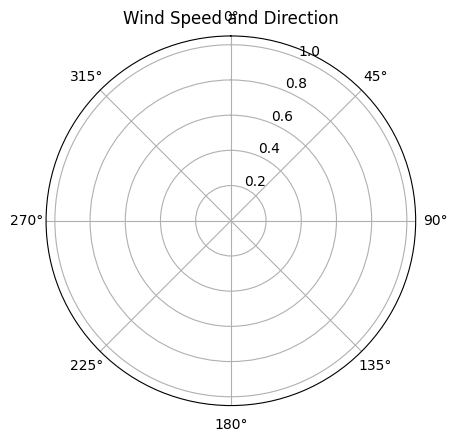

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
windspeed = wind['windspeed']  # Example wind speeds
winddir = wind['winddir']  # Wind directions in degrees

# Convert degrees to radians
winddir_radians = np.deg2rad(winddir)

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.bar(winddir_radians, windspeed, width=0.1, color='b', alpha=0.7)  # Bars for windspeed

# Customize plot
ax.set_theta_zero_location("N")  # North at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title("Wind Speed and Direction", va='bottom')

plt.show()
